## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0  44.329955  1566.826896  0.959276  3.639547  1.542803
1  21.230229  1684.965750  0.344059  3.528770  1.530752
2  61.222186   310.302530  0.403477  1.485419  0.930236
3  19.349717   479.803306  0.408339  3.331454  1.579112
4  74.057416   256.466065  0.779334  3.488766  1.203705


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0647629	total: 69.1ms	remaining: 1m 9s
1:	learn: 1.0543134	total: 69.8ms	remaining: 34.8s
2:	learn: 1.0446408	total: 70.3ms	remaining: 23.4s
3:	learn: 1.0348060	total: 71ms	remaining: 17.7s
4:	learn: 1.0239690	total: 71.5ms	remaining: 14.2s
5:	learn: 1.0142252	total: 72ms	remaining: 11.9s
6:	learn: 1.0038119	total: 72.5ms	remaining: 10.3s
7:	learn: 0.9932376	total: 73ms	remaining: 9.06s
8:	learn: 0.9826972	total: 73.5ms	remaining: 8.1s
9:	learn: 0.9728359	total: 74.1ms	remaining: 7.33s
10:	learn: 0.9629236	total: 74.6ms	remaining: 6.71s
11:	learn: 0.9518577	total: 75ms	remaining: 6.17s
12:	learn: 0.9404269	total: 75.5ms	remaining: 5.73s
13:	learn: 0.9302322	total: 75.9ms	remaining: 5.35s
14:	learn: 0.9198358	total: 76.5ms	remaining: 5.02s
15:	learn: 0.9099000	total: 77ms	remaining: 4.73s
16:	learn: 0.9002275	total: 77.4ms	remaining: 4.47s
17:	learn: 0.8912609	total: 77.8ms	remaining: 4.24s
18:	learn: 0.8828495	total: 78.2ms	remaining: 4.04s
19:

90:	learn: 0.4638648	total: 110ms	remaining: 1.09s
91:	learn: 0.4606949	total: 110ms	remaining: 1.09s
92:	learn: 0.4570938	total: 111ms	remaining: 1.08s
93:	learn: 0.4545775	total: 111ms	remaining: 1.07s
94:	learn: 0.4504967	total: 112ms	remaining: 1.06s
95:	learn: 0.4474762	total: 112ms	remaining: 1.05s
96:	learn: 0.4445944	total: 112ms	remaining: 1.04s
97:	learn: 0.4425574	total: 113ms	remaining: 1.04s
98:	learn: 0.4397173	total: 113ms	remaining: 1.03s
99:	learn: 0.4371335	total: 113ms	remaining: 1.02s
100:	learn: 0.4331440	total: 114ms	remaining: 1.01s
101:	learn: 0.4300683	total: 114ms	remaining: 1s
102:	learn: 0.4272698	total: 115ms	remaining: 999ms
103:	learn: 0.4231993	total: 115ms	remaining: 994ms
104:	learn: 0.4200636	total: 116ms	remaining: 987ms
105:	learn: 0.4167052	total: 116ms	remaining: 980ms
106:	learn: 0.4138761	total: 117ms	remaining: 973ms
107:	learn: 0.4111814	total: 117ms	remaining: 968ms
108:	learn: 0.4081249	total: 118ms	remaining: 961ms
109:	learn: 0.4054993	tot

267:	learn: 0.1889660	total: 187ms	remaining: 511ms
268:	learn: 0.1882565	total: 187ms	remaining: 509ms
269:	learn: 0.1877861	total: 188ms	remaining: 507ms
270:	learn: 0.1873181	total: 188ms	remaining: 506ms
271:	learn: 0.1862669	total: 188ms	remaining: 504ms
272:	learn: 0.1857307	total: 189ms	remaining: 503ms
273:	learn: 0.1853876	total: 189ms	remaining: 501ms
274:	learn: 0.1849405	total: 190ms	remaining: 500ms
275:	learn: 0.1846475	total: 190ms	remaining: 498ms
276:	learn: 0.1843942	total: 190ms	remaining: 497ms
277:	learn: 0.1839801	total: 191ms	remaining: 496ms
278:	learn: 0.1836990	total: 191ms	remaining: 494ms
279:	learn: 0.1829428	total: 192ms	remaining: 493ms
280:	learn: 0.1826437	total: 192ms	remaining: 492ms
281:	learn: 0.1818825	total: 193ms	remaining: 490ms
282:	learn: 0.1811015	total: 193ms	remaining: 489ms
283:	learn: 0.1808247	total: 193ms	remaining: 487ms
284:	learn: 0.1805508	total: 194ms	remaining: 485ms
285:	learn: 0.1799194	total: 194ms	remaining: 484ms
286:	learn: 

511:	learn: 0.0896909	total: 292ms	remaining: 278ms
512:	learn: 0.0893964	total: 292ms	remaining: 277ms
513:	learn: 0.0890754	total: 293ms	remaining: 277ms
514:	learn: 0.0886895	total: 293ms	remaining: 276ms
515:	learn: 0.0884558	total: 294ms	remaining: 275ms
516:	learn: 0.0881263	total: 294ms	remaining: 275ms
517:	learn: 0.0878435	total: 294ms	remaining: 274ms
518:	learn: 0.0874695	total: 295ms	remaining: 273ms
519:	learn: 0.0872433	total: 295ms	remaining: 272ms
520:	learn: 0.0870205	total: 296ms	remaining: 272ms
521:	learn: 0.0866571	total: 297ms	remaining: 272ms
522:	learn: 0.0864390	total: 297ms	remaining: 271ms
523:	learn: 0.0862241	total: 298ms	remaining: 271ms
524:	learn: 0.0858866	total: 298ms	remaining: 270ms
525:	learn: 0.0854434	total: 299ms	remaining: 269ms
526:	learn: 0.0851712	total: 299ms	remaining: 268ms
527:	learn: 0.0848432	total: 299ms	remaining: 268ms
528:	learn: 0.0846363	total: 300ms	remaining: 267ms
529:	learn: 0.0844327	total: 300ms	remaining: 266ms
530:	learn: 

688:	learn: 0.0580172	total: 369ms	remaining: 166ms
689:	learn: 0.0579596	total: 369ms	remaining: 166ms
690:	learn: 0.0577125	total: 369ms	remaining: 165ms
691:	learn: 0.0576563	total: 370ms	remaining: 165ms
692:	learn: 0.0574187	total: 370ms	remaining: 164ms
693:	learn: 0.0571856	total: 371ms	remaining: 163ms
694:	learn: 0.0569732	total: 371ms	remaining: 163ms
695:	learn: 0.0569184	total: 372ms	remaining: 162ms
696:	learn: 0.0567717	total: 372ms	remaining: 162ms
697:	learn: 0.0566228	total: 373ms	remaining: 161ms
698:	learn: 0.0564998	total: 373ms	remaining: 161ms
699:	learn: 0.0564563	total: 374ms	remaining: 160ms
700:	learn: 0.0563150	total: 374ms	remaining: 159ms
701:	learn: 0.0560881	total: 374ms	remaining: 159ms
702:	learn: 0.0559676	total: 375ms	remaining: 158ms
703:	learn: 0.0559143	total: 375ms	remaining: 158ms
704:	learn: 0.0556917	total: 376ms	remaining: 157ms
705:	learn: 0.0555730	total: 376ms	remaining: 157ms
706:	learn: 0.0554354	total: 376ms	remaining: 156ms
707:	learn: 

925:	learn: 0.0325378	total: 473ms	remaining: 37.8ms
926:	learn: 0.0324263	total: 474ms	remaining: 37.3ms
927:	learn: 0.0323949	total: 474ms	remaining: 36.8ms
928:	learn: 0.0323336	total: 475ms	remaining: 36.3ms
929:	learn: 0.0322562	total: 475ms	remaining: 35.8ms
930:	learn: 0.0321705	total: 476ms	remaining: 35.2ms
931:	learn: 0.0321407	total: 476ms	remaining: 34.7ms
932:	learn: 0.0320241	total: 477ms	remaining: 34.2ms
933:	learn: 0.0318836	total: 477ms	remaining: 33.7ms
934:	learn: 0.0318338	total: 477ms	remaining: 33.2ms
935:	learn: 0.0317843	total: 478ms	remaining: 32.7ms
936:	learn: 0.0316464	total: 478ms	remaining: 32.2ms
937:	learn: 0.0315949	total: 479ms	remaining: 31.6ms
938:	learn: 0.0315659	total: 479ms	remaining: 31.1ms
939:	learn: 0.0314925	total: 480ms	remaining: 30.6ms
940:	learn: 0.0313786	total: 480ms	remaining: 30.1ms
941:	learn: 0.0313113	total: 481ms	remaining: 29.6ms
942:	learn: 0.0311769	total: 481ms	remaining: 29.1ms
943:	learn: 0.0311054	total: 481ms	remaining: 

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

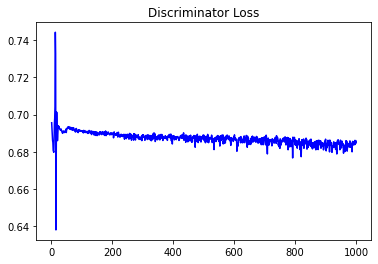

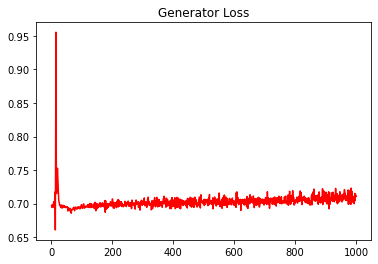

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.1926100952999081


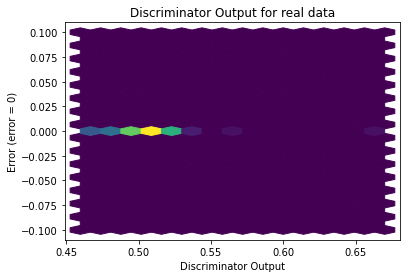

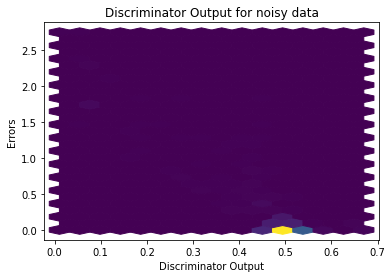

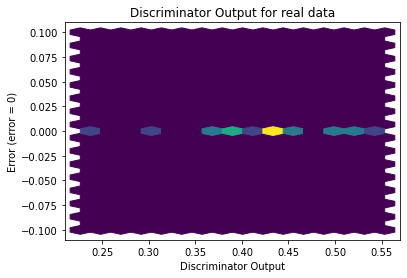

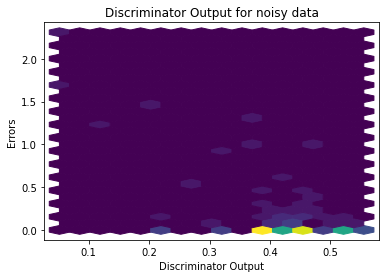

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


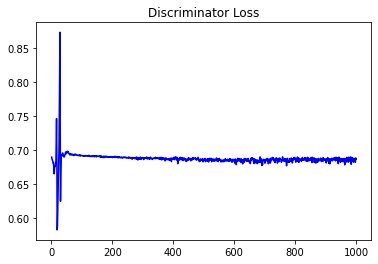

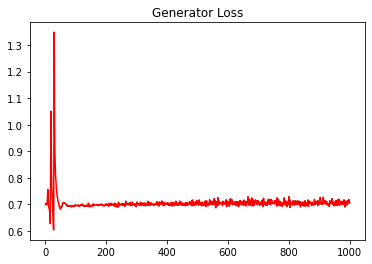

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.12123789191610829


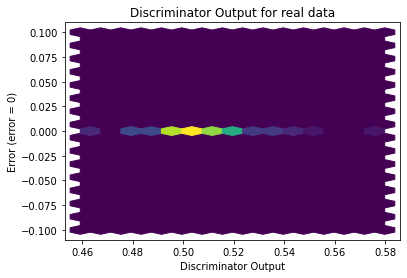

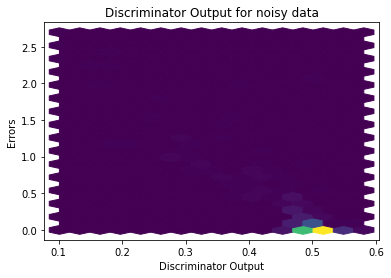

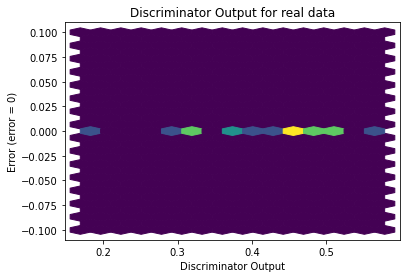

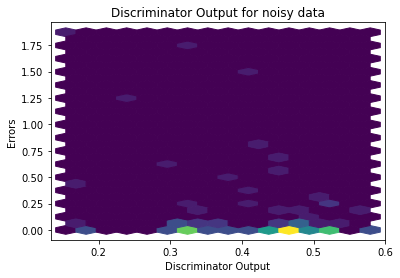

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.9004]], requires_grad=True)
